# Perceptron Algorithm

a. Suppose that the data dimension d equals 2. Generate two clusters of data points with 100 points each, by sampling from Gaussian distributions centered at (0.5, 0.5) and (−0.5, −0.5). Choose the variance of the Gaussian to be small enough so that the data
points are sufficiently well separated. Plot the data points on the 2D plane to confirm that this is the case.

b. Implement the Perceptron algorithm as discussed in class. Choose the initial weights to be zero and the maximum number of epochs as T = 100, and the learning rate α = 1. How quickly does your implementation converge?

c. Now, repeat the above experiment with a second synthetic dataset; this time, increase the variance (radius) of the two Gaussians such that the generated data points from different classes now overlap.

###Create First Dataset with variance 0.02

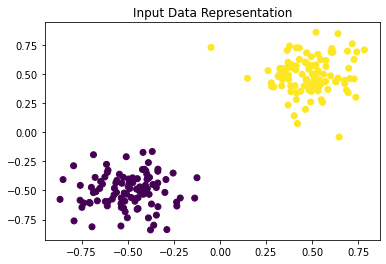

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

d = 2
cov = 0.02*np.eye(d)

means1 = np.array([0.5,0.5])
X1 = np.random.multivariate_normal(means1,cov,100)
Y1 = np.ones(len(X1))

means2 = np.array([-0.5,-0.5])
X2 = np.random.multivariate_normal(means2,cov,100)
Y2 = np.zeros(len(X2))

X = np.concatenate([X1, X2])
# Xb = np.ones(200)
# X = np.c_[X, Xb]
Y = np.concatenate([Y1, Y2]) 
Y[Y==0] = -1

plt.figure()
plt.scatter(X[:,0],X[:,1],c=Y)
plt.title('Input Data Representation')
plt.show()

# X = np.concatenate([np.ones((X.shape[0],1)), X],axis=1)

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

In [0]:
# solution
# w = np.zeros((1,3))
# for count in range(100):
#   flag=0
#   for num in range(len(X)):
#       pred= np.dot(w,X[num,:])
#       if (pred*Y[num] <=0) :
#         w=w+1*Y[num]*X[num,:]
#         flag=1
#         if (flag==0):
#           print(count)
#           break

# time= np.arange(-1.5,1.5,0.1)
# line=-(w[0,0]/w[0,1])*time- w[0,2]/w[0,1]
# plt.plot(time,line)
# plt.scatter(X1[:,0],X1[:,1])
# plt.scatter(X2[:,0],X2[:,1])
# plt.savefig('2.png')
# plt.title('Classification')

In [4]:
#initialize Weights to zero values
W = np.zeros((2,1))
# set some learning rate for gradient descent
lr = 1
import time
t0 = time.time()
Accurancy = []

for epoch in range(100):
    for idx in range(len(X_train)):
        # update weights if the prediction is wrong
        if Y_train[idx]*X_train[idx,:].reshape(1,-1)@W <= 0:
            # update weights if the point is incorrectly classified
            # W(t+1) = W(t) + lr * y_i*x_i
            W = W + (lr)*Y_train[idx]*X_train[idx,:].reshape(-1,1)
    
    # if epoch % 10 == 0:
        # print accruacy on test data
        # keep a track of everything happeniing here.. . . .
    Y_test_pred = (X_test@W).reshape(-1)
    Y_test_pred[Y_test_pred < 0] = -1
    Y_test_pred[Y_test_pred >= 0] = 1
        
    acc = np.mean(Y_test == Y_test_pred)
    Accurancy.append(acc)
    if epoch % 10 == 0:
        print(f"Epoch: {epoch}, Test Accuracy: {acc}")

run_time = time.time() - t0
print(run_time)

Epoch: 0, Test Accuracy: 1.0
Epoch: 10, Test Accuracy: 1.0
Epoch: 20, Test Accuracy: 1.0
Epoch: 30, Test Accuracy: 1.0
Epoch: 40, Test Accuracy: 1.0
Epoch: 50, Test Accuracy: 1.0
Epoch: 60, Test Accuracy: 1.0
Epoch: 70, Test Accuracy: 1.0
Epoch: 80, Test Accuracy: 1.0
Epoch: 90, Test Accuracy: 1.0
0.09394216537475586


(1296, 2)


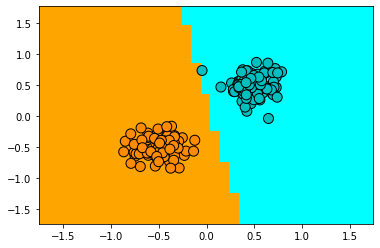

In [5]:
h = 0.1
cmap_light = ListedColormap(['orange', 'cyan'])
cmap_bold = ListedColormap(['darkorange', 'c'])

x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = np.c_[xx.ravel(), yy.ravel()]
print(Z.shape)
Z = Z@W
Z[Z<0] = -1
Z[Z>=0] = 1

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap_bold, edgecolor='k', s=100)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

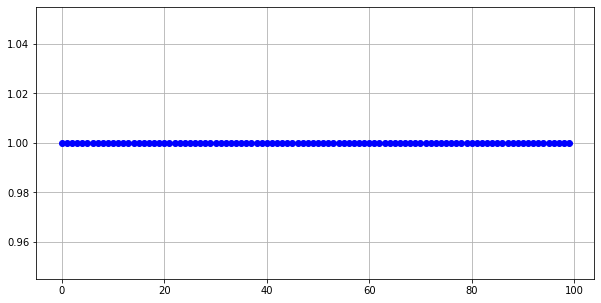

In [6]:

plt.figure(figsize=(10,5))
ep = range(100)
plt.plot(ep,Accurancy,'bo-')
# plt.bar(ep, Accurancy, align='center', alpha=1)
# plt.xticks(ep, Accurancy)
plt.grid()

##Create second Dataset with Higher variance 0.2

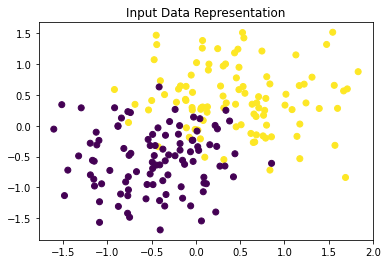

In [7]:

d = 2
cov = 0.3*np.eye(d)

means1 = np.array([0.5,0.5])
X1 = np.random.multivariate_normal(means1,cov,100)
Y1 = np.ones(len(X1))

means2 = np.array([-0.5,-0.5])
X2 = np.random.multivariate_normal(means2,cov,100)
Y2 = np.zeros(len(X1))

X = np.concatenate([X1, X2])
Y = np.concatenate([Y1, Y2]) 
Y[Y==0] = -1

plt.figure()
plt.scatter(X[:,0],X[:,1],c=Y)
plt.title('Input Data Representation')
plt.show()

# X = np.concatenate([np.ones((X.shape[0],1)), X],axis=1)

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [9]:
#initialize Weights to zero values
W = np.zeros((2,1))
# set some learning rate for gradient descent
lr = 1
import time
t0 = time.time()
Accurancy = []

for epoch in range(100):
    for idx in range(len(X_train)):
        # update weights if the prediction is wrong
        if Y_train[idx]*X_train[idx,:].reshape(1,-1)@W <= 0:
            # update weights if the point is incorrectly classified
            # W(t+1) = W(t) + lr * y_i*x_i
            W = W + (lr)*Y_train[idx]*X_train[idx,:].reshape(-1,1)
    
    # if epoch % 10 == 0:
        # print accruacy on test data
        # keep a track of everything happeniing here.. . . .
    Y_test_pred = (X_test@W).reshape(-1)
    Y_test_pred[Y_test_pred < 0] = -1
    Y_test_pred[Y_test_pred >= 0] = 1
        
    acc = np.mean(Y_test == Y_test_pred)
    Accurancy.append(acc)
    if epoch % 10 == 0:
        print(f"Epoch: {epoch}, Test Accuracy: {acc}")

run_time = time.time() - t0
print(run_time)

Epoch: 0, Test Accuracy: 0.925
Epoch: 10, Test Accuracy: 0.9
Epoch: 20, Test Accuracy: 0.9
Epoch: 30, Test Accuracy: 0.9
Epoch: 40, Test Accuracy: 0.8
Epoch: 50, Test Accuracy: 0.9
Epoch: 60, Test Accuracy: 0.9
Epoch: 70, Test Accuracy: 0.825
Epoch: 80, Test Accuracy: 0.825
Epoch: 90, Test Accuracy: 0.9
0.1039726734161377


(2400, 2)


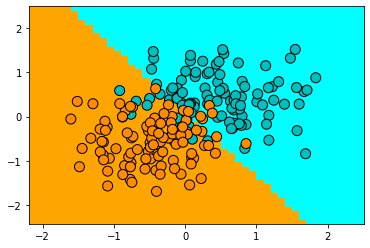

In [10]:
h = 0.1
cmap_light = ListedColormap(['orange', 'cyan'])
cmap_bold = ListedColormap(['darkorange', 'c'])

x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = np.c_[xx.ravel(), yy.ravel()]
print(Z.shape)
Z = Z@W
Z[Z<0] = -1
Z[Z>=0] = 1

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap_bold, edgecolor='k', s=100)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

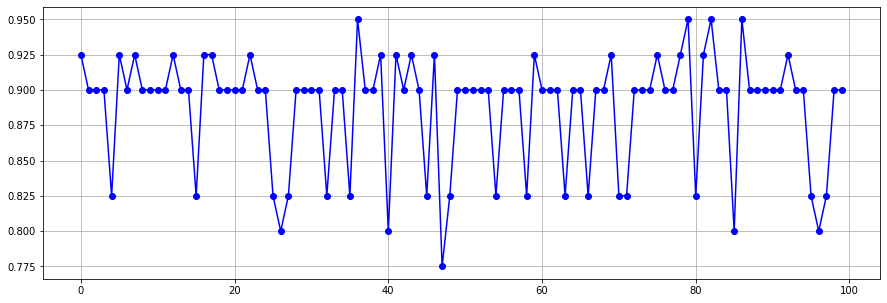

In [11]:
plt.figure(figsize=(15,5))
ep = range(100)
plt.plot(ep,Accurancy,'bo-')
# plt.bar(ep, Accurancy, align='center', alpha=1)
# plt.xticks(ep, Accurancy)
plt.grid()